In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('./sample_data_2017_FINAL.csv')

In [82]:
df = df[~df['CYTotalExpensesAmt'].isna()]
df = df[~df['CYTotalRevenueAmt'].isna()]
df = df[~df['GrossReceiptsAmt'].isna()]
df = df[~df['NetAssetsOrFundBalancesEOYAmt'].isna()]
# df = df[~df['EmployeeCnt'].isna()]

In [84]:
print(len(df))
df = df[['CYTotalExpensesAmt', 'CYTotalRevenueAmt', 'GrossReceiptsAmt', 'NetAssetsOrFundBalancesEOYAmt']] #, 'EmployeeCnt']]

78337


In [85]:
cols = df.columns
df = pd.DataFrame(preprocessing.scale(df))
df.columns = cols

In [86]:
df.head()

,CYTotalExpensesAmt,CYTotalRevenueAmt,GrossReceiptsAmt,NetAssetsOrFundBalancesEOYAmt
0,-0.043679,-0.042951,-0.030206,-0.039521
1,-0.056426,-0.057560,-0.036596,-0.051835
2,-0.056012,-0.057179,-0.036424,-0.051193
3,-0.053091,-0.055113,-0.035585,-0.046870
4,-0.054189,-0.055811,-0.035893,-0.051309


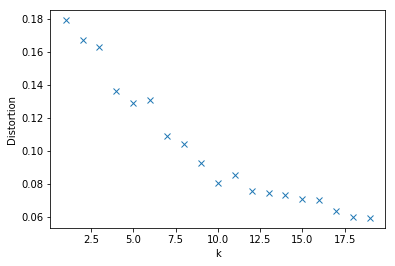

In [87]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++', random_state = 0).fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'x')
plt.xlabel('k')
plt.ylabel('Distortion')
# plt.title('num_topics = ' + str(num_topics))
plt.show()

In [88]:
k10 = KMeans(n_clusters=10, init = 'k-means++', random_state = 0).fit(df)

In [89]:
df['labels'] = k10.labels_

In [91]:
df.groupby(['labels']).count()

,CYTotalExpensesAmt,CYTotalRevenueAmt,GrossReceiptsAmt,NetAssetsOrFundBalancesEOYAmt
labels,,,,
0,882,882,882,882
1,1,1,1,1
2,1,1,1,1
3,19,19,19,19
4,1,1,1,1
5,2,2,2,2
6,59,59,59,59
7,77195,77195,77195,77195
8,1,1,1,1


In [124]:
(77195+882+176)/len(df)

0.9989277097667769

In [122]:
df_label = df.groupby(['labels']).mean()
df_label['colors'] = colors
df_label = df_label.set_index('colors')
df_label.sort_values(by='NetAssetsOrFundBalancesEOYAmt')

,CYTotalExpensesAmt,CYTotalRevenueAmt,GrossReceiptsAmt,NetAssetsOrFundBalancesEOYAmt
colors,,,,
blue,-0.038004,-0.038992,-0.026840,-0.032057
cyan,1.006207,1.042669,0.574269,1.055128
green,3.914530,3.996499,2.184049,2.884475
purple,9.511667,9.831887,5.561577,7.099672
teal,21.439986,21.927755,13.140627,12.493448
orange,218.912874,213.487006,141.009683,12.518144
pink,23.151583,24.629029,59.371765,17.196991
black,11.632606,14.058768,156.539555,17.944831
grey,91.506608,99.470841,67.256247,80.315430


In [50]:
from sklearn.decomposition import PCA 

In [93]:
pca = PCA(n_components=2)
pca.fit(df)
df_pca = pca.transform(df)

In [94]:
df_pca = pd.DataFrame(df_pca)
df_pca['labels'] = df['labels']

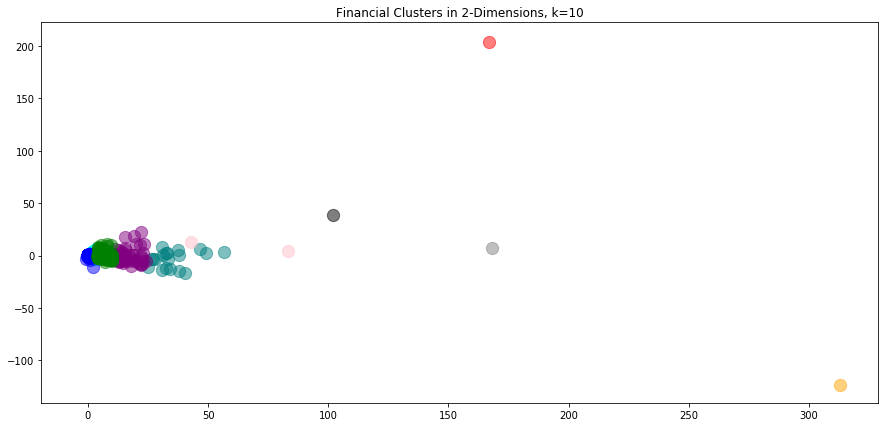

In [125]:
plt.figure(figsize=(15,7))
colors = ['cyan', 'orange', 'red', 'teal', 'black', 'pink', 'purple', 'blue', 'grey', 'green']
for label in range(10):
    df_sample = df_pca[df_pca['labels'] == label]
    x = plt.scatter(df_sample[0], df_sample[1], c = colors[label], alpha = .5, s = 150)
#     plt.legend([x], colors[label])
#     legend = plt.legend(handles=[x])
#     ax = plt.gca().add_artist(legend)
plt.title("Financial Clusters in 2-Dimensions, k=10")
plt.show()

## x-axis appears to be correlated with income (Revenue and Gross Receipts)
## y-axis Net Assets/Revenue(?)

In [ ]:
plt.figure(figsize=(20,10))
colors = ['pink', 'green', 'blue', 'black', 'orange', 'yellow', 'purple', 'red', 'grey', 'cyan']

df_sample = df_pca[df_pca['labels'] == 1]
x = plt.scatter(df_sample[0], df_sample[1], c = colors[label], alpha = .5, s = 150)
x1 = 
    df_sample = df_pca[df_pca['labels'] == label]
    x = plt.scatter(df_sample[0], df_sample[1], c = colors[label], alpha = .5, s = 150)
plt.legend([x], colors[label])
# x1 = plt.scatter(df_pca[0], df_pca[1], c = df['labels_12'], alpha = .5, s = 100)
# plt.legend([x], [df['labels_12'].unique()], scatterpoints=1)
plt.show()